# Welcome to GGS416 Satellite Image Analysis - Week 4 

In this tutorial we are going to begin by understanding the different types of satellite image metadata.

Next, we will progress to some basic satellite image process steps.

First, we will quickly cover coordinate referencing systems.


## Working with a Coordinate Reference System (CRS)

We need to be able to map data points to precise locations across space. Indeed, this underpins our ability to process and analyze satellite images. 

There are hundreds of different types of Coordinate Reference Systems, with many geographical regions specifying their own to enable local consistency and precision. 

- A **Geographic Coordinate System** measures locations on Earth in latitude and longitude and is based on either a spherical or ellipsoidal coordinate system. 
    - Latitude is measured in degrees north or south of the equator. 
    - Longitude is measured in degrees east or west of a prime meridian (a meridian divides a spheroid into two hemispheres).
    - See the World Geodetic System (WGS84):https://en.wikipedia.org/wiki/World_Geodetic_System


- A **projected coordinate system** instead represents Earth locations via a specific map projection using cartesian coordinates (x,y) on a planar (2D) surface. 
    - This approach maps a curved Earth surface onto a flat 2D plane. 
    - Common units include metric meters and imperial feet. 
    - See the Universal Transverse Mercator (UTM): https://en.wikipedia.org/wiki/Universal_Transverse_Mercator_coordinate_system
    

## Satellite imagery metadata

We often have information about our data which is not actually the data itself. 

This is referred to as **Metadata**. 

('Meta' meaning 'above' or 'beyond')

We will need to import `Rasterio` so that we can load the Planet image data we downloaded in the previous tutorial.

In [1]:
# Load rasterio into our jupyter session
import rasterio

Let's get started using the 4-band Planet image we downloaded in the previous session.

We will need to specify the image name, and then use the `Rasterio` open function to load the raster.

As we downloaded the images last week, in the 'week3' directory, we ill need to navigate to their location.

The desired image filename is '20190321_174348_0f1a_3B_AnalyticMS.tif', which is in the 'week3' folder. 

As we need to go up one folder, we can use a double period '..'.

Then we can can into the 'week3' folder. 

We can now put that together into a single path string, as follows: 

In [2]:
# This path instructs the function to go up one director '..' and then into the 'week3' folder:
image_filename = "../week3/20190321_174348_0f1a_3B_AnalyticMS.tif"

# Remember that the 4-band image is comprised of blue, green, red and near-infrared
# PlanetScope images shoudl be in a UTM projection.
my_image = rasterio.open(image_filename)

# We can view the rasterio object as follows:
my_image

<open DatasetReader name='../week3/20190321_174348_0f1a_3B_AnalyticMS.tif' mode='r'>

We can now begin to explore information about the loaded imagery.

For example, we can view the filename for the given image asset:

In [3]:
print(my_image.name)

../week3/20190321_174348_0f1a_3B_AnalyticMS.tif


We can also view the image tags associated which include:
- 'AREA_OR_POINT' - indication of whether this is an area or a point representation.
- 'TIFFTAG_DATETIME' - the specific date and time the image was taken in Coordinated Universal Time (UTC).

In [4]:
print(my_image.tags())

{'AREA_OR_POINT': 'Area', 'TIFFTAG_DATETIME': '2019:03:21 17:43:48'}


In case we need to check, we can obtain the number of bands and indexes which are present within this image:

In [5]:
# Present number of image bands 
print(my_image.count)

# Present number of indexes
print(my_image.indexes)

4
(1, 2, 3, 4)


By querying the image object with these basic functions, we can establish information prior to visualizing. 

Finally, we can unpack these different layers as follows (remember we practiced unpacking in the intro to python lecture):

In [6]:
# Unpacking our image layers into separate variables for blue, green, red and infrared:
blue, green, red, nir = my_image.read()

# Let's inspect our blue variable
blue

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

Remember that these are `NumPy` arrays:

e.g. `array([0, 0, ..., 0, 0])`

There are actually many ways we can unpack these bands, they might just take a few more lines of code. For example:


In [7]:
blue = my_image.read(1)
green = my_image.read(2)
red = my_image.read(3)
nir = my_image.read(4)

blue

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

Or it is possible to just read all the layers at once, creating a large multidimensional array:

In [8]:
data = my_image.read()
data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)

As this multidimensional array is essentially a list of lists, we can still index into the array like we have previously in the Python tutorial example:

In [10]:
# Extract the blue array which will be in position zero
blue = data[0]
blue

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

Finally, we can examine the dimensions of one of these layers:

In [11]:
# Print the data type of the blue layer (which will be a NumPy data type) 
print(blue.dtype)

# Using the blue band as an example, examine the width & height of the image (in pixels)
w = blue.shape[0]
h = blue.shape[1]

# Let's print the dimensions of the blue layer 
print("width: {w}, height: {h}".format(w=w, h=h))


uint16
width: 4213, height: 8341


## Extracting meta info from a satellite image

In [67]:
# # user rasterio to open a 3-band (red, green, blue) PlanetScope visual asset

# import rasterio
# satdat = rasterio.open("20160831_180302_0e26_3B_Visual.tif")


We can get the bounds of the current image in the current projected coordinate reference system using the bounds command:

In [14]:
# Find the bounding box of the image.
# The bounding box is the minimum possible box which envelopes the present data.
print(my_image.bounds)

BoundingBox(left=544491.0, bottom=4178370.0, right=569514.0, top=4191009.0)


We can then get the map unit dimensions in the original units of the coordinate reference system, by subtracting the different bounds of the image, as follows:

In [17]:
# Find the image bound in the original measurement units
width_in_projected_units = my_image.bounds.right - my_image.bounds.left
height_in_projected_units = my_image.bounds.top - my_image.bounds.bottom

print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))

Width: 25023.0, Height: 12639.0


Remember that this raster image will be comprised of a grid.

We can therefore find the total number of rows and columns by using the height and width commands, as follows:

In [19]:
# Find the height and width of our image using the relevant functions:
print("Rows: {}, Columns: {}".format(my_image.height, my_image.width))

Rows: 4213, Columns: 8341


We may want to clarify the dimensions of a single pixel in our raster grid.

Thus, we can find the resolution of the x and y pixels as follows: 

In [28]:
# Find the resolution of a single pixel
x_length = (my_image.bounds.right - my_image.bounds.left) / my_image.width
y_length = (my_image.bounds.top - my_image.bounds.bottom) / my_image.height

print("Length of x is: {}. Length of y is: {}".format(x_length, y_length))
print("Therefore, it is {} that the pixels are square, with dimensions {} x {} meters.".format(
    x_length == y_length, x_length, y_length))

Length of x is: 3.0. Length of y is: 3.0
Therefore, it is True that the pixels are square, with dimensions 3.0 x 3.0 meters.


We can actually get the CRS of the data as follow:

In [30]:
# Print the current coordinate reference system of the image
my_image.crs

CRS.from_dict(init='epsg:32610')

In [73]:
# Convert pixel coordinates to world coordinates.

# Upper left pixel
row_min = 0
col_min = 0

# Lower right pixel.  Rows and columns are zero indexing.
row_max = satdat.height - 1
col_max = satdat.width - 1

# Transform coordinates with the dataset's affine transformation.
topleft = satdat.transform * (row_min, col_min)
botright = satdat.transform * (row_max, col_max)

print("Top left corner coordinates: {}".format(topleft))
print("Bottom right corner coordinates: {}".format(botright))

Top left corner coordinates: (623577.0, 4214037.0)
Bottom right corner coordinates: (637626.0, 4185885.0)


In [74]:
# All of the metadata required to create an image of the same dimensions, datatype, format, etc. is stored in
# the dataset's profile:

satdat.profile


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 9385, 'height': 4684, 'count': 4, 'crs': CRS.from_dict(init='epsg:32610'), 'transform': Affine(3.0, 0.0, 623577.0,
       0.0, -3.0, 4214037.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}

# File Compression

"Raster datasets use compression to reduce filesize. There are a number of compression methods, all of which fall into two categories: lossy and lossless. Lossless compression methods retain the original values in each pixel of the raster, while lossy methods result in some values being removed. Because of this, lossy compression is generally not well-suited for analytic purposes, but can be very useful for reducing storage size of visual imagery.

All Planet data products are available as GeoTIFFs using lossless LZW compression. By creating a lossy-compressed copy of a visual asset, we can significantly reduce the dataset's filesize. In this example, we will create a copy using the "JPEG" lossy compression method:"

In [75]:
# import sys
# !{sys.executable} -m pip install humanize

In [76]:
import os
from humanize import naturalsize as sz

# returns size in bytes
size = os.path.getsize("20160831_180302_0e26_3B_Visual.tif")

# output a human-friendly size
print(sz(size))

69.1 MB


## Copying a dataset

In [77]:
# read all bands from source dataset into a single 3-dimensional ndarray

data = satdat.read()

# write new file using profile metadata from original dataset
# and specifying JPEG compression

profile = satdat.profile
profile['compress'] = 'JPEG'

with rasterio.open('compressed.tif', 'w', **profile) as dst:
    dst.write(data)
    
new_size = os.path.getsize("compressed.tif")
print(sz(new_size))

14.4 MB


In [78]:
# import sys
# !conda install --yes --prefix {sys.prefix} matplotlib

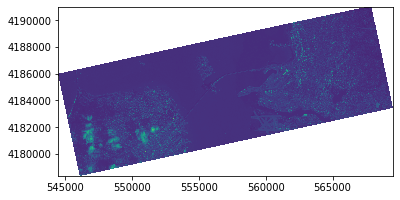

In [79]:
# import rasterio
from matplotlib import pyplot as plt

# This notebook explores a single 4 band (blue, green, red, NIR) PlanetScope scene in a UTM projection.
image_file = "20190321_174348_0f1a_3B_AnalyticMS.tif"

# Use Rasterio to open the image.
satdat = rasterio.open(image_file)
satdat

# rasterio.plot.show is a shortcut to matplotlib plotting

from rasterio.plot import show
show(satdat)

"Using a mask to cut raster along boundary
In this exercise we're going to clip a fullsized PlanetScope dataset to an area of interest (AOI) polygon. Because this AOI is a vector dataset (versus raster), we'll use Rasterio's sister-library, Fiona, to read the geoJSON dataset:"

In [80]:
!conda install --yes --prefix {sys.prefix} fiona


EnvironmentLocationNotFound: Not a conda environment: D:\Github\satellite-image-analysis\notebooks\week3\{sys.prefix}



In [81]:
import fiona 

with fiona.open("bbox.shp", "r") as shapefile:
    my_geojson = [feature["geometry"] for feature in shapefile]
my_geojson

[{'type': 'Polygon',
  'coordinates': [[(559611.0942910485, 4185982.336050618),
    (562533.1571305746, 4186004.0364823746),
    (562552.8939972542, 4183407.7928339303),
    (559629.9087783357, 4183386.096975274),
    (559611.0942910485, 4185982.336050618)]]}]

In [82]:
my_geojson = [{
	"type": "Polygon", #let's define our geometry type, which as we have a square, is a polygon.
	"coordinates": [ #Here are our actual geometry coordinates
	  [
		[
		  559611.0942910484736785,
		  4183386.0969752739183605
		],
		[
		  562552.8939972541993484,
		  4183386.0969752739183605
		],
		[
		  562552.8939972541993484,
		  4186004.0364823746494949
		],
		[
		  559611.0942910484736785,
		  4186004.0364823746494949
		],
		[
		  559611.0942910484736785,
		  4183386.0969752739183605
		]
	  ],
	]
  }]
my_geojson

[{'type': 'Polygon',
  'coordinates': [[[559611.0942910485, 4183386.096975274],
    [562552.8939972542, 4183386.096975274],
    [562552.8939972542, 4186004.0364823746],
    [559611.0942910485, 4186004.0364823746],
    [559611.0942910485, 4183386.096975274]]]}]

"In order to clip our original raster to the boundary defined by the AOI, we'll use rasterio's mask function. This will create a copy of our original dataset, with all pixels outside of the input AOI shape set to nodata values."

In [83]:
# import rasterio's mask tool
from rasterio.mask import mask

# apply mask with crop=True to crop the resulting raster to the AOI's bounding box
with rasterio.open(image_file) as img:
    clipped, transform = mask(img, my_geojson, crop=True)
    
print(clipped.shape)

(4, 873, 981)


"Using a copy of the metadata from our original raster dataset, we can write a new geoTIFF containing the new, clipped raster data:"

In [84]:
# use the metadata from our original mosaic
meta = img.meta.copy()

# update metadata with new, clipped mosaic's boundaries
meta.update({"transform": transform,
    "height":clipped.shape[1],
    "width":clipped.shape[2]})

# write the clipped-and-cropped dataset to a new GeoTIFF
with rasterio.open('clipped.tif', 'w', **meta) as dst:
    dst.write(clipped)

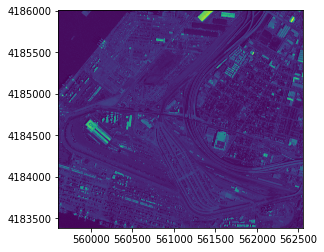

In [85]:
clipped_img = rasterio.open("clipped.tif")
show(clipped_img)